# 01 - Workflow fundamentals

**Imports**

In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__


'1.12.1'

**Creating linear data**

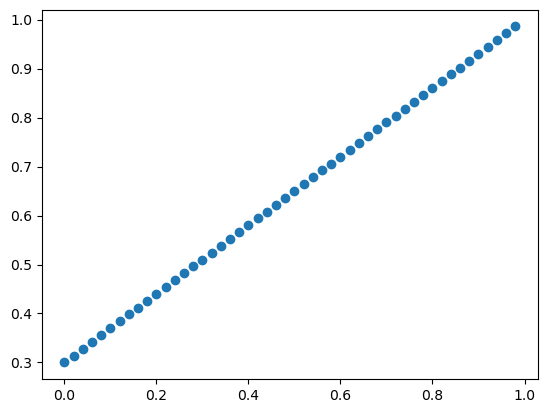

In [2]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

plt.scatter(X,y)

**Split data into train and test sets**

In [3]:
# Create train/test split
# 80% of data used for training set, 20% for testing
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

**Plotting data**

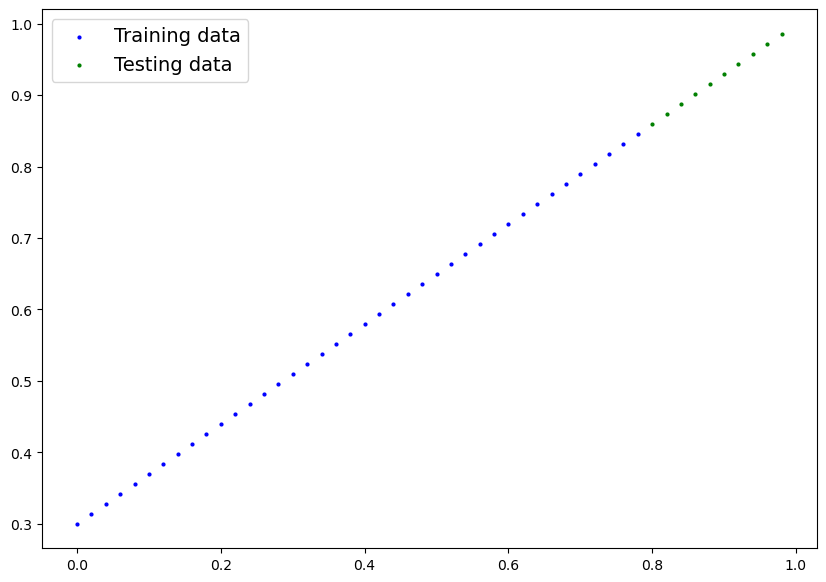

In [4]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

plot_predictions()


**Building initial model**

In [5]:
class LinearRegressionModel(nn.Module):
    """Model class of a linear regression"""
    def __init__(self):
        super().__init__()

        self.weight = nn.Parameter(
            torch.randn(1, requires_grad=True, dtype=torch.float))

        self.bias = nn.Parameter(
            torch.randn(1, requires_grad=True, dtype=torch.float))

    # The forward function does the computation
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias


**Initialize a model and inspect it**

In [6]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

**Perform inference using the model**

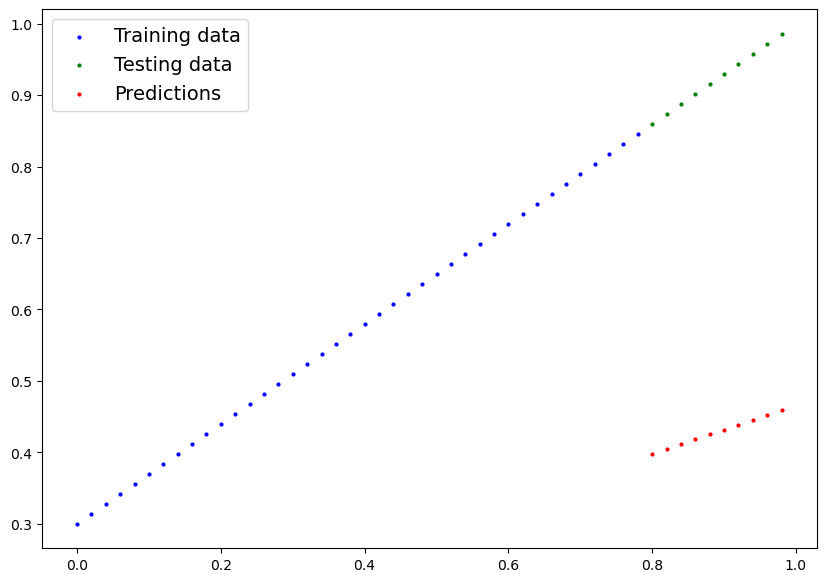

In [7]:
with torch.inference_mode():
    y_preds = model_0(X_test)
    
plot_predictions(predictions=y_preds)

**Training loop**

In [20]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.001)
epochs = 1000 # hyperparameter because we set it ourselvees

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

    # ------ TRAIN ------ #
    # Train mode: sets all parameters that require gradients, to require gradients
    model_0.train()

    # Train
    y_pred = model_0(X_train)

    # Calc loss
    loss = loss_fn(y_pred, y_train)

    # Zero the gradients of the optimizer (they accumulate by default)
    optimizer.zero_grad()

    # Perform backpropagation on the loss
    loss.backward()

    # Progress the optimizer (compute all requires_grad params using gradient descent)
    optimizer.step()

    # ------ TEST ------ #
    # Set to testing mode
    model_0.eval()
    with torch.inference_mode(): # Do not keep track of gradients as this is not needed during testing
        # Forward pass
        test_pred = model_0(X_test)

        # Calculate test loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")




Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.4931890368461609
Epoch: 100 | Loss: 0.19767141342163086 | Test loss: 0.35847947001457214
Epoch: 200 | Loss: 0.08973254263401031 | Test loss: 0.22795839607715607
Epoch: 300 | Loss: 0.05357731133699417 | Test loss: 0.15086300671100616
Epoch: 400 | Loss: 0.04549176245927811 | Test loss: 0.11657620966434479
Epoch: 500 | Loss: 0.04160415381193161 | Test loss: 0.10088418424129486
Epoch: 600 | Loss: 0.03811401128768921 | Test loss: 0.08986451476812363
Epoch: 700 | Loss: 0.03466346859931946 | Test loss: 0.08097299933433533
Epoch: 800 | Loss: 0.03122851625084877 | Test loss: 0.07297395914793015
Epoch: 900 | Loss: 0.027794325724244118 | Test loss: 0.06490625441074371


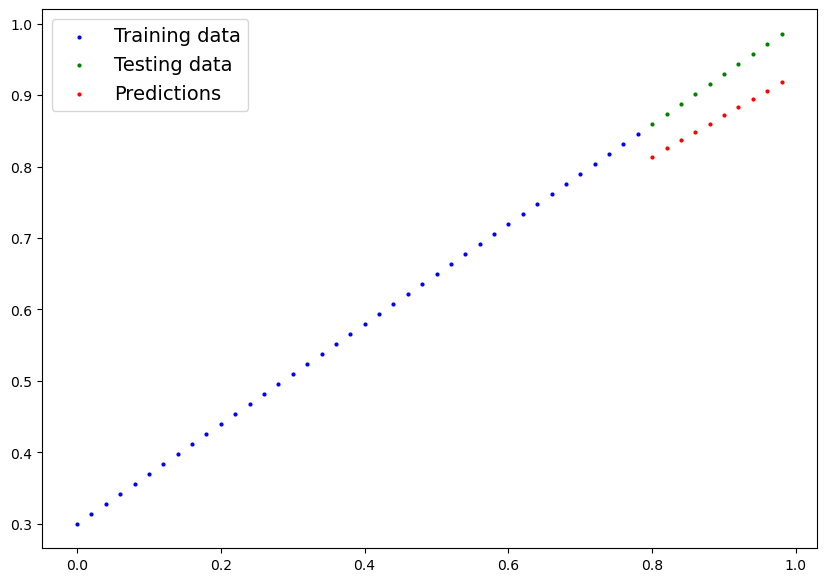

In [21]:
plot_predictions(predictions=test_pred)


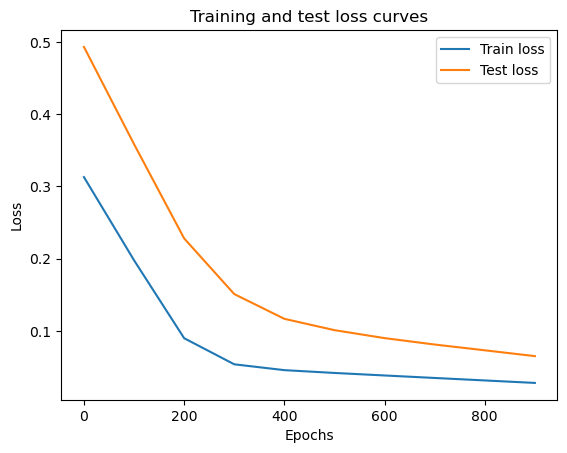

In [22]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()


**Saving and loading PyTorch models**

In [25]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("DeepLearning/pytorch_tutorial/models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),  # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)


Saving model to: DeepLearning\pytorch_tutorial\models\01_pytorch_workflow_model_0.pth
